<a href="https://colab.research.google.com/github/AbhienayaSri9509/7305219509/blob/main/Forest_Fire_Detection_Using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)



Epoch 1/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 647s 11s/step - accuracy: 0.7909 - loss: 0.4421 - val_accuracy: 0.7995 - val_loss: 0.4111
Epoch 2/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9688 - loss: 0.2256 - val_accuracy: 0.7786 - val_loss: 0.4274
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 617s 11s/step - accuracy: 0.8278 - loss: 0.3947 - val_accuracy: 0.8229 - val_loss: 0.4393
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7500 - loss: 0.4765 - val_accuracy: 0.8229 - val_loss: 0.4323
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 623s 11s/step - accuracy: 0.8227 - loss: 0.3913 - val_accuracy: 0.8125 - val_loss: 0.4157
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8125 - loss: 0.3920 - val_accuracy: 0.8125 - val_loss: 0.4126
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 692s 12s/step - accuracy: 0.8285 - loss: 0.3825 - val_accuracy: 0.8203 - val_loss: 0.4211
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7812 - loss: 0.4971 - val_accuracy: 0.8255 -

In [3]:
#IMPORTING NECESSARY LIBRARIES
import  os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten, Dense , Dropout, Input




In [10]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [18]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


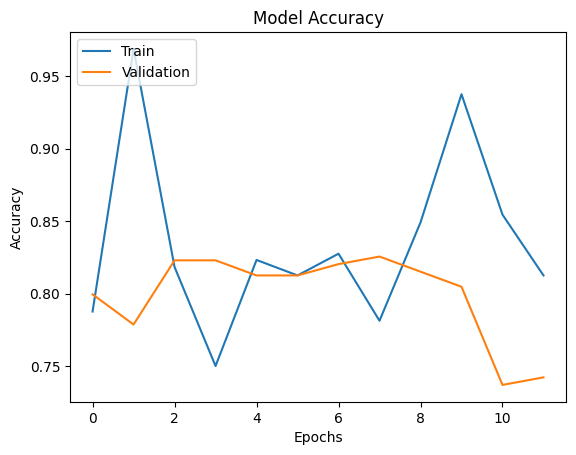

In [33]:
# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


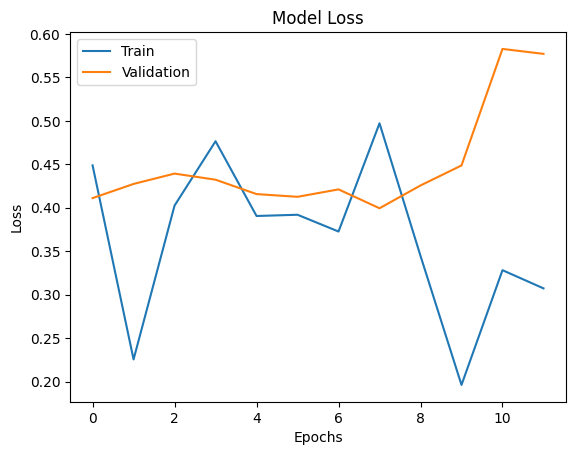

In [32]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:

# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 113s 10s/step - accuracy: 0.7537 - loss: 0.4906
Test Accuracy: 0.7865


In [31]:

# Save the model
model.save('FFD.keras')

In [29]:


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()



In [24]:


os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')



['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


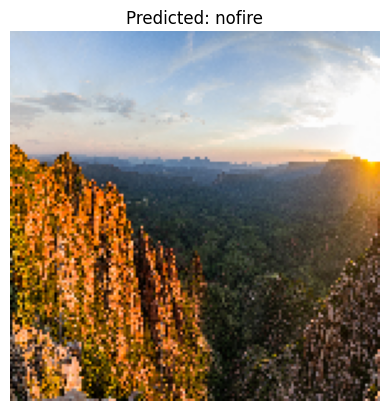

In [25]:

predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/35554264024_b33afa21ac_o.jpg')

In [12]:
#map the indices
class_mapping=train_generator.class_indices
#print(class_mapping)
#extract the class names
class_names=list(class_mapping.keys())
print("Class Names:", class_names)


Class Names: ['fire', 'nofire']


In [14]:
# Let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [4]:
# to ensure the gpu is present
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print('GPU is used')
else:
  print('GPU is not used')

GPU is not used


In [6]:
#load and explore the dataset
train_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [7]:
#list all the classes
classes =os.listdir(train_dir)
num_classes=len(classes)

#Display the class naames
print(f'Number of Classes:{num_classes}')
print(f' Classes:{classes}')



Number of Classes:2
 Classes:['nofire', 'fire']


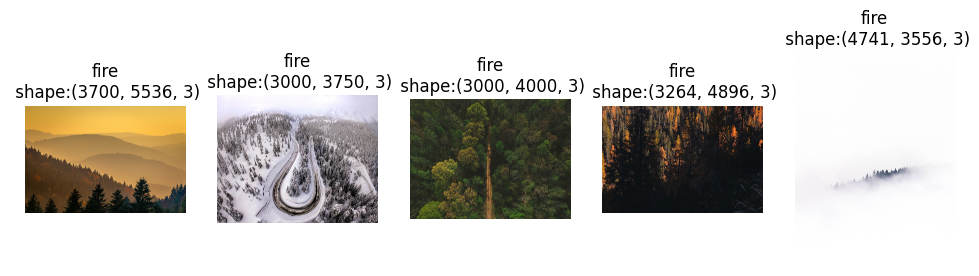

In [8]:
#Lets visualize the images in data set
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]}\n shape:{img.shape}')
  plt.axis('off')
plt.show()